# <h1><center>**`Seoul_Bike_Trip_Duration_Prediction`**</center></h1>

### ` About dataset and analysis done`
A combination of the Seoul bike and climate data was taken to prepare the final dataset. Since climate data is the most influential data for a trip, climate data was taken into account. After combining the one-year (January 2018 to December 2018) Seoul Bike data obtained from Seoul Data Park with the climate data. The one-year data consists of 99,87,224 entries. The following preprocessing was already done on the data:
1. The trips without station details are dropped. After this step, the total number of entries is 99,74,018.
2. Dropping 0 entries in Trip duration and Trip distance is the first step. After this step number of entries came down to 98,30,314.
3. Data lies outside 3 standard deviations from the mean value is excluded in both trip duration and trip distance. After outliers' removal, the dataset reduced to 96,01,139 entries.

The final dataset that was available on Kaggle and was used by us for analysis and modeling consisted of 96,01,139 entries and 25 columns (24 features and 1 target column).


### `Dataset Desciption`
1. **Duration**:Time taken for the trip      **#(Target Column)**
2. **Distance**: Distance between the pickup and the drop
3. **Plong**: Pickup longitude
4. **Platd**: Pickup latitude
5. **DLong**: Drop off longitude
6. **DLatd**: Drop off latitude
7. **Haversine**: Function useed to calculate distance using latitudes and longitudes
8. **Pmonth**: Pickup month
9. **Pday**: Pickup day
10. **Phour**: Pickup hour
11. **Pmin**: Pickup minutes
12. **PDweek**: Pickup week
13. **Dmonth**: Drop off month
14. **Dday**: Drop off day
15. **Dhour**: Drop off hour
16. **Dmin**: Drop off minutes
17. **DDweek**: Drop off week
18. **Temp**: Temperature
19. **Precip**: Precipitation
20. **Wind**: Wind speed
21. **Humid**: Humidity
22. **Solar**: Solar radiation
23. **Snow**: Snow fall
24. **GroundTemp**: Ground Temperature
25. **Dust**: 1 hour average fine dust concentration

### Link:-
https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-trip-duration-prediction

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data_path = r"C:\Users\USER-PC\Desktop\Akash Cloudy ML\3. ML Projects\4. Seoul Bike Trip Duraion Prediction\For_modeling.csv"

In [3]:
df = pd.read_csv(
        data_path,
        dtype={
            'Duration':'int8',
            'Distance':'int8',
            'PLong':'float32',
            'PLatd':'float32',
            'DLong':'float32',
            'DLatd':'float32',
            'Haversine':'float32',
            'Pmonth':'int8',
            'Pday':'int8',
            'Phour':'int8',
            'Pmin':'int8',
            'PDweek':'int8',
            'Dmonth':'int8',
            'Dday':'int8',
            'Dhour':'int8',
            'Dmin':'int8',
            'DDweek':'int8',
            'Temp':'float32',
            'Precip':'float32',
            'Wind':'float32',
            'Humid':'float32',
            'Solar':'float32',
            'Snow':'float32',
            'GroundTemp':'float32',
            'Dust':'float32'
        },
        index_col = 0
).sample(frac=1)
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9699422,21,-118,37.571068,126.998192,37.565331,127.007843,1.063239,12,21,18,...,29,4,8.7,0.0,1.2,35.0,0.00,0.0,3.6,119.0
6136904,14,68,37.545166,127.057510,37.556030,127.078644,2.220476,9,12,14,...,34,2,26.9,0.0,1.6,45.0,2.27,0.0,39.5,18.0
9501674,19,86,37.528816,126.924530,37.528816,126.924530,0.000000,12,10,12,...,54,0,-0.1,0.0,1.0,22.0,1.69,0.0,3.5,39.0
8608417,3,68,37.478180,126.897408,37.476952,126.891869,0.507496,11,6,7,...,23,1,8.3,0.0,0.9,84.0,0.00,0.0,6.1,72.0
8757131,18,-42,37.510658,126.842537,37.530338,126.838257,2.220635,11,11,17,...,37,6,8.9,0.0,3.0,57.0,0.03,0.0,8.7,78.0


In [4]:
df.shape

(9601139, 25)

### The data is obtained after removal of the rows containing outliers in the columns trip durations and trip distance.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601139 entries, 9699422 to 8795171
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int8(12)
memory usage: 659.3 MB


## Exploratory Data Analysis

In [6]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [7]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.432565e+01,1.279721e+02,3.432564e+01,1.279722e+02,1.873459e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856859e+01,1.784749e-02,1.817955e+00,5.384053e+01,7.273332e-01,9.947883e-03,2.073591e+01,3.245477e+01
std,2.504333e+01,7.404757e+01,3.137731e+00,9.872919e-01,3.137838e+00,9.874983e-01,1.984842e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.436137e+00,3.732322e-01,9.633572e-01,1.727728e+01,9.099125e-01,1.625089e-01,1.255552e+01,2.381996e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


### Observations:- 
1. There are data points where haversine value is 0.
2. There are data points where the distance is -ve.

### Difference between haversine and distance:
Distance:- Total distance travelled by the bike data.
Haversine:- Its calculated based on Latitude and Longitude.

## Exploring the data points where the haversine value is 0
The data points with haversine value as 0, the pickup longitude and drop off longitude should be equal and the pickup latitude and drop off latitude should be equal; since the angle theta will be zero.

In [8]:
df[df["Haversine"]==0].shape

(955083, 25)

In [9]:
9601139-955083

8646056

In [10]:
df = df[df['Haversine'] != 0].reset_index(drop=True)

In [11]:
df[df["Haversine"]==0].shape

(0, 25)

In [12]:
df.shape

(8646056, 25)

## Exploring the data points where the distance is negative.

In [13]:
df[df["Distance"]<0].shape

(4319967, 25)

In [14]:
# transforming all the -ve distances to +ve distances:
df["Distance"] = df["Distance"].apply(lambda x : abs(x))

In [15]:
df.shape

(8646056, 25)

In [16]:
df[df["Distance"]==0].shape

(62196, 25)

In [17]:
df = df[df['Distance'] != 0].reset_index(drop=True)

In [18]:
df.shape

(8583860, 25)

In [20]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,...,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06
mean,2.312955e+01,6.469965e+01,3.460125e+01,1.279688e+02,3.460125e+01,1.279688e+02,2.079864e+00,7.602144e+00,1.578074e+01,1.423189e+01,...,3.003426e+01,2.918544e+00,1.836584e+01,1.813646e-02,1.804388e+00,5.417077e+01,7.089524e-01,1.020995e-02,2.044619e+01,3.250423e+01
std,2.286273e+01,3.668851e+01,2.865904e+00,9.828255e-01,2.866008e+00,9.830202e-01,1.985638e+00,2.711003e+00,8.746162e+00,6.334664e+00,...,1.730503e+01,1.965265e+00,9.535543e+00,3.796493e-01,9.658508e-01,1.732285e+01,9.048861e-01,1.645087e-01,1.261980e+01,2.391682e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,3.200000e+01,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.264499e-01,6.000000e+00,8.000000e+00,9.000000e+00,...,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.400000e+01,6.400000e+01,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404485e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,9.600000e+01,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.554889e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,1.280000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


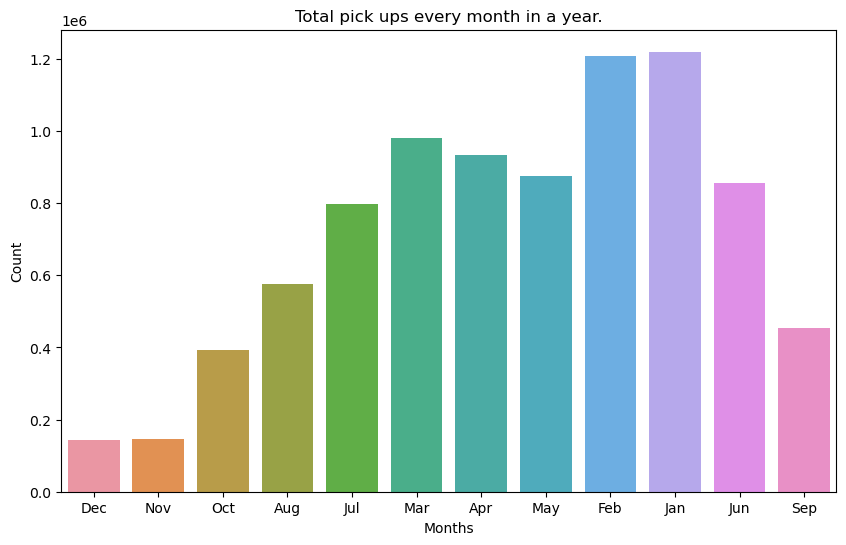

In [36]:
temp = df["Pmonth"].value_counts()
pickup_months = temp.index
trips_count = temp.values
month_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

plt.figure(figsize=(10,6))
sns.barplot(x=pickup_months, y=trips_count)
plt.xlabel("Months")
plt.ylabel("Count")
plt.xticks(pickup_months-1,month_labels)
plt.title("Total pick ups every month in a year.")
plt.show()

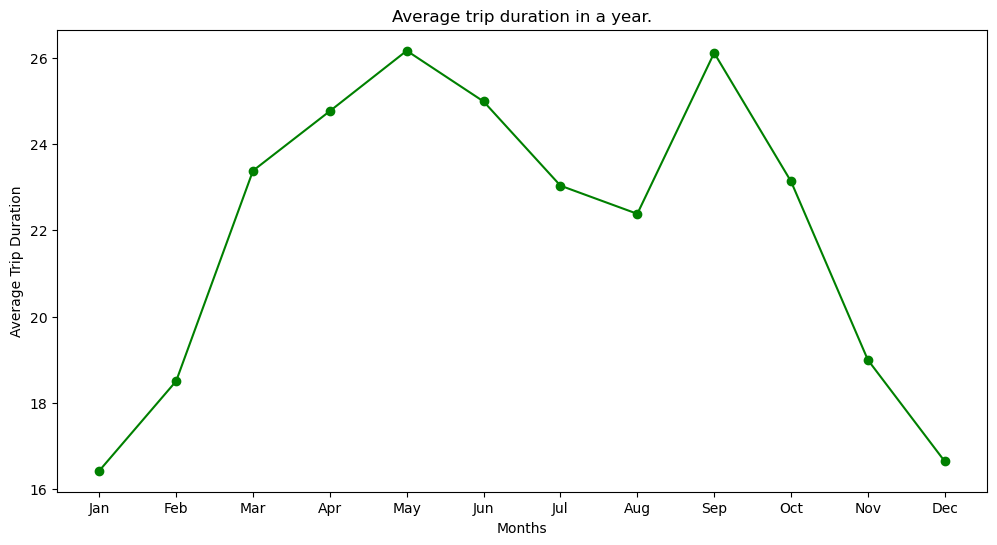

In [28]:
temp = df.groupby("Pmonth")["Duration"].mean()
pickup_months = temp.index

plt.figure(figsize=(12,6))
plt.title("Average trip duration in a year.")
plt.plot(temp.index,temp.values,"g-o")
plt.xlabel("Months")
plt.ylabel("Average Trip Duration")
plt.xticks(pickup_months,month_labels)
plt.show()

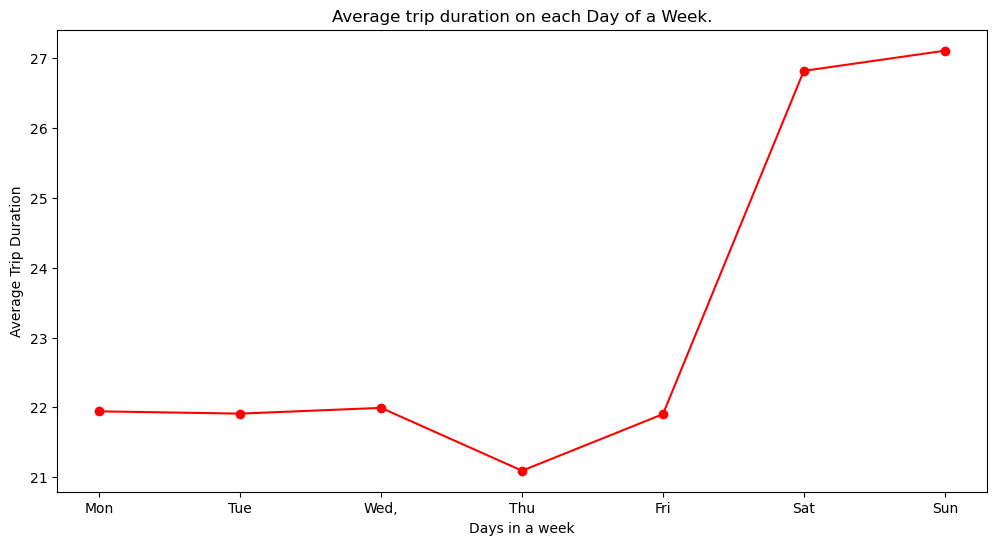

In [31]:
temp = df.groupby("PDweek")["Duration"].mean()
day_labels = ["Mon","Tue","Wed,","Thu","Fri","Sat","Sun"]

plt.figure(figsize=(12,6))
plt.title("Average trip duration on each day of a Week")
plt.plot(temp.index,temp.values,"r-o")
plt.xlabel("Days in a week")
plt.ylabel("Average Trip Duration")
plt.xticks(temp.index,day_labels)
plt.show()

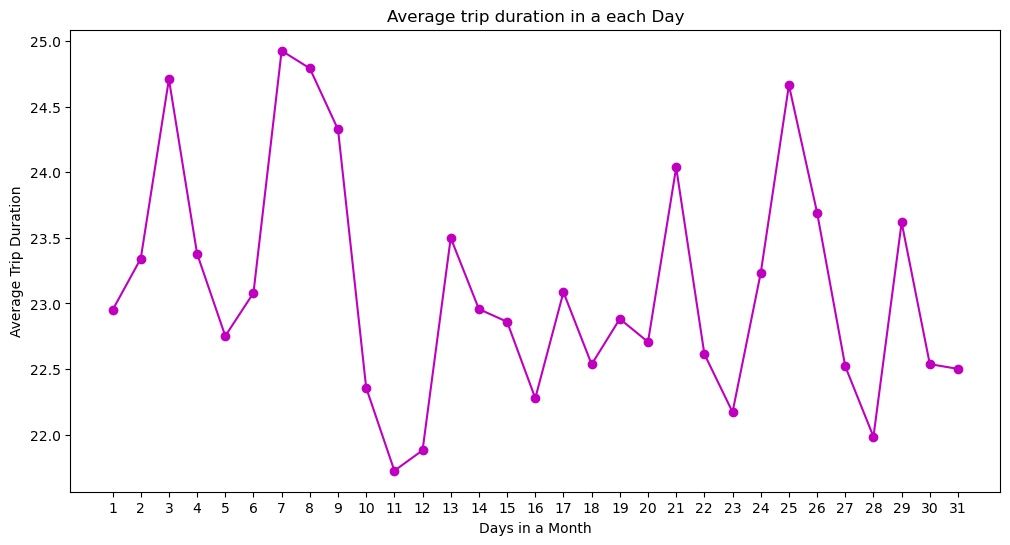

In [32]:
temp = df.groupby("Pday")["Duration"].mean()

plt.figure(figsize=(12,6))
plt.title("Average trip duration on each day of a month")
plt.plot(temp.index,temp.values,"m-o")
plt.xticks(ticks=range(1,32))
plt.xlabel("Days in a Month")
plt.ylabel("Average Trip Duration")
plt.show()

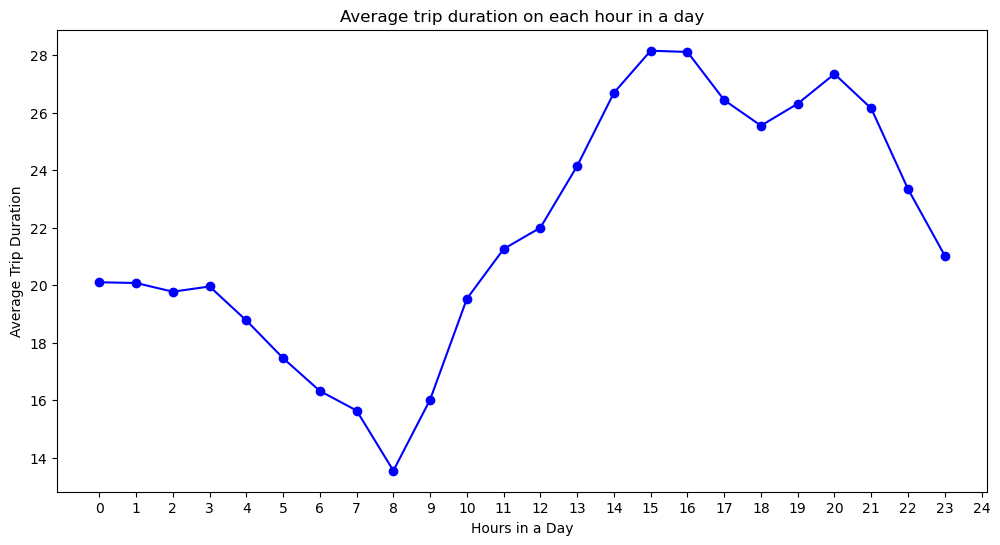

In [33]:
temp = df.groupby("Phour")["Duration"].mean()

plt.figure(figsize=(12,6))
plt.title("Average trip duration on each hour in a day")
plt.plot(temp.index,temp.values,"b-o")
plt.xticks(ticks=range(0,25))
plt.xlabel("Hours in a Day")
plt.ylabel("Average Trip Duration")
plt.show()

## Observations
1. From Total pick ups every month in a year plot, More number of pick ups happen during January and February months

2. From Average trip duration in each Month plot, The average trip duration is less during months. November, December, January and February. Since this is the period of time in which South Korea experiences winter season. (This shows the trip duration is affected by the temperature)

3. From Average trip duration in each Day of a Week plot, we can observe that the average trip duration is high during weekends. 

4. From Average trip duration on each hour in a day plot. The average trip duration is high during 15th, 16th and 20th hours of the day.

**From the above observations we can say that temperature and time are influential factors for trip duration estimation.**

In [34]:
df.shape

(8583860, 25)

In [38]:
continous_data_columns = [i for i in df.columns if df[i].nunique()>40]
categorical_data_columns = [i for i in df.columns if i not in continous_data_columns]
print("Continous Data Columns: ", continous_data_columns)
print("Categorical Data Columns: ", categorical_data_columns)

Continous Data Columns:  ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
Categorical Data Columns:  ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


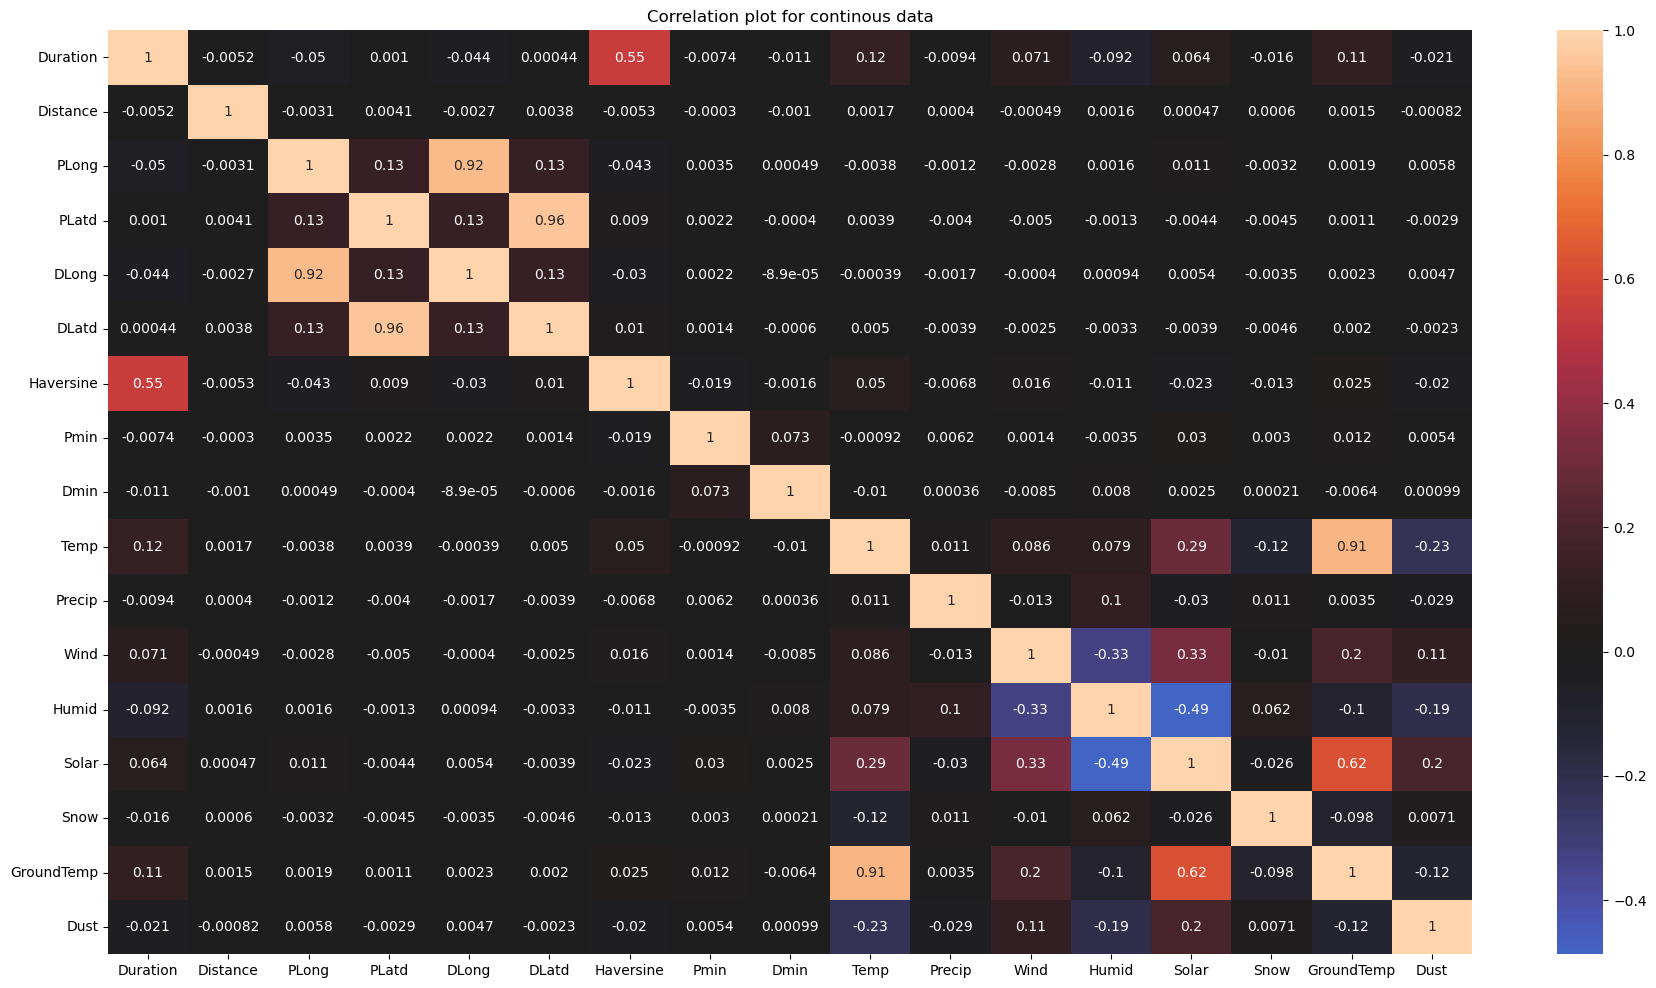

In [39]:
plt.figure(figsize=(22,12))
sns.heatmap(df[continous_data_columns].corr(),annot=True,center=0)
plt.title("Correlation plot for continous data")
plt.show()

## Observations:
1. PLong and DLon are highly correlated, but these represent the pickup and drop off longitudes.
2. PLatd and DLatd are highly correlated, but these represent the pick up and drop off latitudes.
3. Temp and GroundTemp are highly correlated and Temp has more correlation with Duration (target data) when comapred to GroundTemp.

In [41]:
# Saving the entire data:
# df.to_csv("./cleaned_seoul_bike_data.csv",index=False)

### In this notebook I have done cleaning and analysis on the data taken from kaggle.